In [5]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# 讀取資料
load_df = pd.read_csv('ANOVA111.csv')  # 認知負荷
imi_df = pd.read_csv('newimi.csv')     # 內在動機

# 加上 ID 與 Condition（每位受試者對應三筆資料）
participant_count = len(load_df) // 3
ids = list(range(1, participant_count + 1)) * 3
conditions = ['B', 'T', 'C'] * participant_count

# 將資料補上 ID 與 Condition
load_df['ID'] = ids
load_df['Condition'] = conditions
imi_df['ID'] = ids
imi_df['Condition'] = conditions

# 合併兩份資料
merged_df = pd.merge(load_df, imi_df, on=['ID', 'Condition'])

# 計算三種負荷的平均
merged_df['Intrinsic'] = merged_df[['I1', 'I2']].mean(axis=1)
merged_df['Extraneous'] = merged_df[['E1', 'E2', 'E3']].mean(axis=1)
merged_df['Germane'] = merged_df[['G1', 'G2', 'G3']].mean(axis=1)

In [ ]:
import statsmodels.formula.api as smf

# 先將 Condition 轉換為類別型（這會自動生成 dummy variables）
merged_df['Condition'] = merged_df['Condition'].astype('category')

# 以 Block ('B') 為參考組的回歸模型
model = smf.ols('interest_enjoyment ~ Intrinsic + Condition', data=merged_df).fit()
print(model.summary())



=== Intrinsic × Condition predicting Performance ===


PatsyError: Error evaluating factor: NameError: name 'Performance' is not defined
    Performance ~ Intrinsic * Condition
    ^^^^^^^^^^^


--- Block: Predicting interest_enjoyment using Intrinsic ---
                            OLS Regression Results                            
Dep. Variable:     interest_enjoyment   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     3.343
Date:                Tue, 08 Jul 2025   Prob (F-statistic):             0.0811
Time:                        05:16:56   Log-Likelihood:                -43.899
No. Observations:                  24   AIC:                             91.80
Df Residuals:                      22   BIC:                             94.15
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

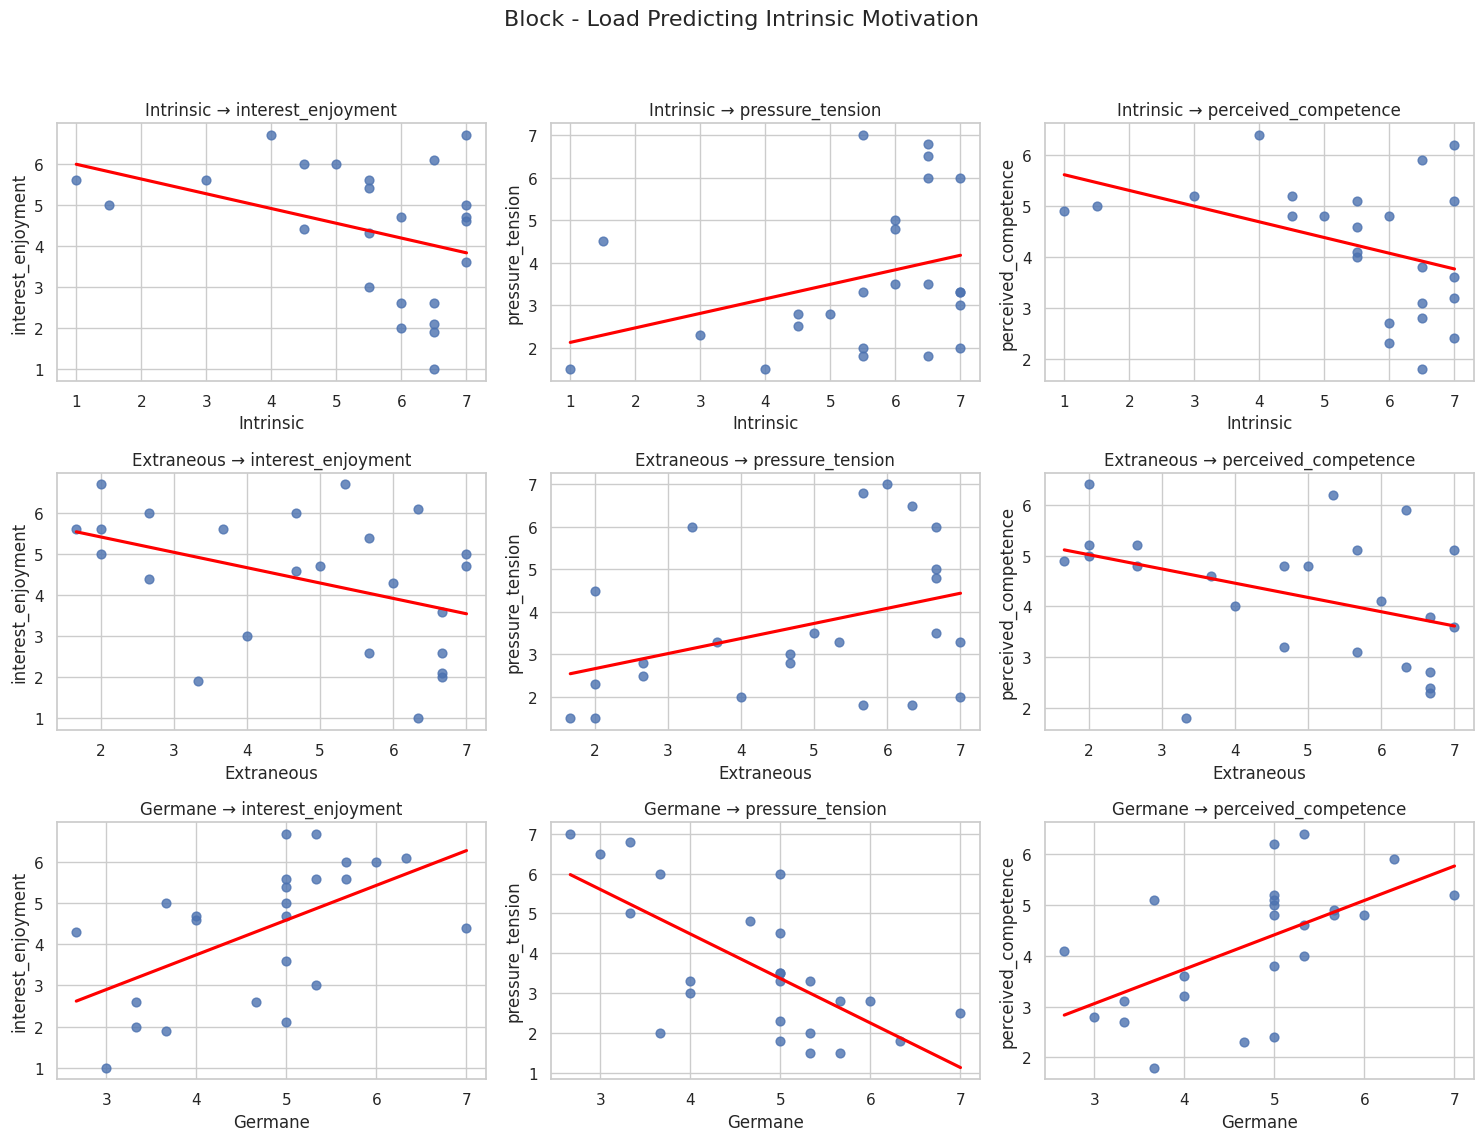

In [ ]:
# Block condition
cond = 'B'
cond_name = 'Block'
subset = merged_df[merged_df['Condition'] == cond]

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle(f'{cond_name} - Load Predicting Intrinsic Motivation', fontsize=16)

for i, load_var in enumerate(load_types):
    x = subset[load_var]

    for j, imi_var in enumerate(imi_vars):
        y = subset[imi_var]
        X = sm.add_constant(x)
        model = sm.OLS(y, X).fit()
        print(f"\n--- {cond_name}: Predicting {imi_var} using {load_var} ---")
        print(model.summary())

        ax = axes[i, j]
        sns.regplot(x=x, y=y, ax=ax, ci=None, scatter_kws={"s": 40}, line_kws={"color": "red"})
        ax.set_title(f"{load_var} → {imi_var}")
        ax.set_xlabel(load_var)
        ax.set_ylabel(imi_var)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



--- Text: Predicting interest_enjoyment using Intrinsic ---
                            OLS Regression Results                            
Dep. Variable:     interest_enjoyment   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     3.982
Date:                Tue, 08 Jul 2025   Prob (F-statistic):             0.0585
Time:                        05:17:38   Log-Likelihood:                -40.272
No. Observations:                  24   AIC:                             84.54
Df Residuals:                      22   BIC:                             86.90
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

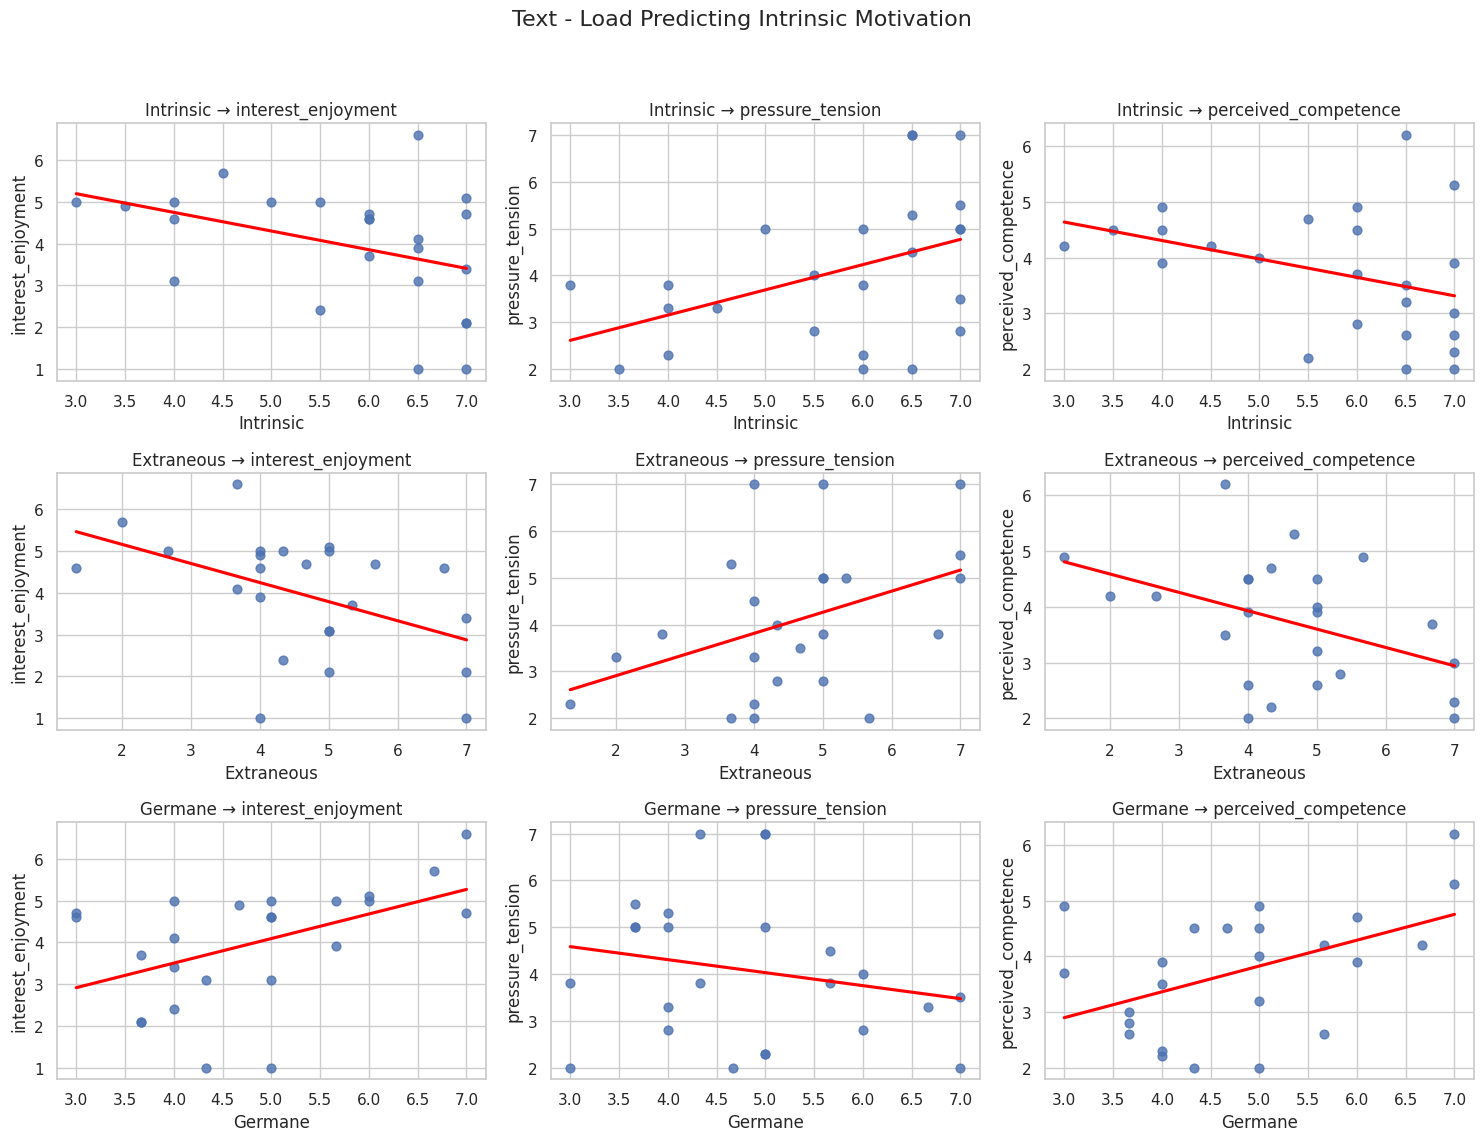

In [ ]:
# Text condition
cond = 'T'
cond_name = 'Text'
subset = merged_df[merged_df['Condition'] == cond]

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle(f'{cond_name} - Load Predicting Intrinsic Motivation', fontsize=16)

for i, load_var in enumerate(load_types):
    x = subset[load_var]

    for j, imi_var in enumerate(imi_vars):
        y = subset[imi_var]
        X = sm.add_constant(x)
        model = sm.OLS(y, X).fit()
        print(f"\n--- {cond_name}: Predicting {imi_var} using {load_var} ---")
        print(model.summary())

        ax = axes[i, j]
        sns.regplot(x=x, y=y, ax=ax, ci=None, scatter_kws={"s": 40}, line_kws={"color": "red"})
        ax.set_title(f"{load_var} → {imi_var}")
        ax.set_xlabel(load_var)
        ax.set_ylabel(imi_var)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [ ]:
# Code-way condition
cond = 'C'
cond_name = 'Code-way'
subset = merged_df[merged_df['Condition'] == cond]

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle(f'{cond_name} - Load Predicting Intrinsic Motivation', fontsize=16)

for i, load_var in enumerate(load_types):
    x = subset[load_var]

    for j, imi_var in enumerate(imi_vars):
        y = subset[imi_var]
        X = sm.add_constant(x)
        model = sm.OLS(y, X).fit()
        print(f"\n--- {cond_name}: Predicting {imi_var} using {load_var} ---")
        print(model.summary())

        ax = axes[i, j]
        sns.regplot(x=x, y=y, ax=ax, ci=None, scatter_kws={"s": 40}, line_kws={"color": "red"})
        ax.set_title(f"{load_var} → {imi_var}")
        ax.set_xlabel(load_var)
        ax.set_ylabel(imi_var)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [ ]:
import pandas as pd
import statsmodels.api as sm

# 條件、負荷、動機變項
load_types = ['Intrinsic', 'Extraneous', 'Germane']
imi_vars = ['interest_enjoyment', 'pressure_tension', 'perceived_competence']
cond_map = {'B': 'Block', 'T': 'Text', 'C': 'Code-way'}

# 顯著性標記函數
def significance_marker(p):
    if p < 0.001:
        return '***'
    elif p < 0.01:
        return '**'
    elif p < 0.05:
        return '*'
    else:
        return ''

# 儲存結果
all_results = []

def extract_stats_with_sig_combined(df, condition_code, condition_name):
    subset = df[df['Condition'] == condition_code]
    results = []

    for load in load_types:
        x = subset[load]
        X = sm.add_constant(x)

        for dv in imi_vars:
            y = subset[dv]
            model = sm.OLS(y, X).fit()

            p = model.f_pvalue
            sig = significance_marker(p)

            p_display = f"{round(p, 5)}{sig}"

            results.append({
                'Condition': condition_name,
                'LoadType': load,
                'DV': dv,
                'Beta': round(model.params[1], 3),
                'p-value': p_display
            })
    return results

# 執行分析
for code, name in cond_map.items():
    all_results.extend(extract_stats_with_sig_combined(merged_df, code, name))

# 建立 DataFrame
df_summary = pd.DataFrame(all_results)

# 顯示結果
print(df_summary)

# 若要儲存為 CSV 檔
df_summary.to_csv("regression_results.csv", index=False)


   Condition    LoadType                    DV   Beta     p-value
0      Block   Intrinsic    interest_enjoyment -0.360     0.08109
1      Block   Intrinsic      pressure_tension  0.342     0.12262
2      Block   Intrinsic  perceived_competence -0.309    0.04984*
3      Block  Extraneous    interest_enjoyment -0.375    0.04219*
4      Block  Extraneous      pressure_tension  0.355     0.07349
5      Block  Extraneous  perceived_competence -0.281    0.04875*
6      Block     Germane    interest_enjoyment  0.847   0.00471**
7      Block     Germane      pressure_tension -1.117  0.00019***
8      Block     Germane  perceived_competence  0.677   0.00312**
9       Text   Intrinsic    interest_enjoyment -0.447     0.05853
10      Text   Intrinsic      pressure_tension  0.540    0.03519*
11      Text   Intrinsic  perceived_competence -0.331     0.07527
12      Text  Extraneous    interest_enjoyment -0.457    0.02263*
13      Text  Extraneous      pressure_tension  0.452    0.04208*
14      Te

/tmp/ipython-input-19-644776639.py:44: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Beta': round(model.params[1], 3),
/tmp/ipython-input-19-644776639.py:44: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Beta': round(model.params[1], 3),
/tmp/ipython-input-19-644776639.py:44: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Beta': round(model.params[1], 3),
/tmp/ipython-input-19-644776639.py:44: FutureWarning: Series.__getitem__ tre

In [6]:
import statsmodels.formula.api as smf

# 確保 Condition 為類別變數
merged_df['Condition'] = merged_df['Condition'].astype('category')

# 內在動機變項列表
motivation_vars = ['interest_enjoyment', 'pressure_tension', 'perceived_competence']

# 認知負荷變項
load_vars = ['Intrinsic', 'Extraneous', 'Germane']

# 跑每一組模型
for dv in motivation_vars:
    for load in load_vars:
        print(f"\n=== {load} × Condition predicting {dv} ===")
        formula = f"{dv} ~ {load} * Condition"
        model = smf.ols(formula, data=merged_df).fit()
        print(model.summary())



=== Intrinsic × Condition predicting interest_enjoyment ===
                            OLS Regression Results                            
Dep. Variable:     interest_enjoyment   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.6360
Date:                Tue, 15 Jul 2025   Prob (F-statistic):              0.672
Time:                        04:37:50   Log-Likelihood:                -393.37
No. Observations:                 216   AIC:                             798.7
Df Residuals:                     210   BIC:                             819.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------